# Using ML techniques to infer a multiplier

### Scenario

You discover that the number of apple seeds is directly tied to the overall height of the fruit, the seed count just needs to be multiplied by some fixed number. Create a model such that given the number of seeds, you can predict the height of the fruit. ***Use an iterative guessing approach to estimate the value of the multiplier.***

### We use two packages for this
1. random - to generate random numbers
2. numpy - this package handles matricies (or more technically arrays, which may have more dimensions than a matrix)

In [114]:
import numpy as np
import random 

## Part 1 - Set up data

### Randomly select the multiplier
This will be the value the seed count is multiplied by, and the number we're trying to discover
* Select a random number between 10 and 100 (uniform distribution) and set it equal to a variable named "actual_multiplier"

In [115]:
actual_multiplier = random.uniform(10,100)
print(actual_multiplier)

20.74604563536897


### Collect some apple seeds
Collect some samples of apple seeds, and measure the associated fruits
* To start we'll use 10 samples with different numbers of seeds in each sample. Here we'll use numbers 1, 2, ..., 9, 10
    * Make a numpy array named seed_count_array with these values
* For obvious reasons, we will not be measuring any apples right now. We're going to cheat a bit and say that the height of the associated apples were the number of seeds times our multiplier value plus noise
    * Make a numpy array called apple_height_array that is length 10, and equal to the seed_count_array times the actual_multiplier
    * Use the np.random.random method to create an array of length 10, and name it noise_array
    * Add the values from the elements of the noise array to the elements of apple_height_array
* Print out the actual_multiplier, seed_count_array, and apple_height_array

In [116]:
seed_count_array = np.array(range(1,11)) # alternate - np.arange(1,11) or [x+1 for x in range(10)] - list comprehension
seed_count_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [117]:
apple_height_array = seed_count_array * actual_multiplier
apple_height_array

array([ 20.74604564,  41.49209127,  62.23813691,  82.98418254,
       103.73022818, 124.47627381, 145.22231945, 165.96836508,
       186.71441072, 207.46045635])

In [118]:
noise_array = np.array(object = np.random.random(size = 10))
noise_array
apple_height_array = apple_height_array+noise_array

### Sidenote - How contrived is this exercise?

This is toy problem where we know the answer before we start. The point of this example is understand overall process of iterative improvement. Relationships typically being modelled with ML are more complicated than a simple multiplier, but suprisingly little changes for more complex problems. Here we're modelling a single parameter, but many models used in biology have 10s of millions, but are built out of many simple calculations like our exercise. The math is more advanced (but maybe not as much as you might think) and beyond our scope, but wouldn't serve much practical use anyway since these calculations are never ever done by hand, and a comprehensive understanding of them is not strictly necessary unless researching novel algorithm designs.

## Part 2 - Build out a training loop

### Steps (Add steps from slides here)
1. write nested for-loops to 1) make a random prediction for each sample and 2) go through 10 epochs (function name - predict_multiplier - guesses a value from -100 to 100)
2. function name - calculate_loss that substracts the prediction from true value (at each step we will print loss, predicted multiplier, actual multiplier, predicted target, actual target (height) and no. of seeds)
3. create a variable - keeps track of the best loss value (best_loss) - make a list (called best_param_list) that appends to another list loss,predicted multiplier, actual multiplier, predicted target, actual target, and no. of seeds whenever a new loss is found. 2) try increasing no. of epochs (comment out print statement)
4. update the predict function to take in previous step's prediction and loss to make the output more accurate - add a step before your loop to initialise these values
5.Multiply the loss function with a learning rate of 0.001

In [13]:
#1
def predict_multiplier(min = -100, max = 100):
    multiplier = random.uniform (min, max)
    return multiplier

In [119]:
#2
def calculate_loss(true_value, predicted_value):
    loss = true_value - predicted_value
    return loss

In [ ]:
#2
epoch_count = 10
for epoch in range (epoch_count): 
    print(f"loss, predicted_target, actual_target, predicted_multiplier, actual_multiplier, seed_number")
    for s, seed in enumerate(seed_count_array): #s contains index and seed contains the value for that index
        guess = predict_multiplier()
        predicted_target = seed * guess
        loss = calculate_loss(apple_height_array[s], predicted_target)
        print(loss, predicted_target, apple_height_array[s], guess, actual_multiplier, seed)
    print()

In [54]:
#3
best_loss = 1000
epoch_count = 1000
best_param_list = []
for epoch in range (epoch_count): 
    # print(f"loss, predicted_target, actual_target, predicted_multiplier, actual_multiplier, seed_number")
    for s, seed in enumerate(seed_count_array): #s contains index and seed contains the value for that index
        guess = predict_multiplier()
        predicted_target = seed * guess
        loss = calculate_loss(apple_height_array[s], predicted_target)
        output = [loss, predicted_target, apple_height_array[s], guess, actual_multiplier, seed]
        if abs(best_loss) > abs(loss):
            best_loss = loss
            best_param_list.append(output)
            # print(best_param_list)
       # print(best_loss, loss, predicted_target, apple_height_array[s], guess, actual_multiplier, seed)
   # print()

In [ ]:
#3
print(best_loss)
for row in best_param_list:
    print(row)
print(best_param_list[-1][0])

In [120]:
#4
def predict_multiplier_1(prev_predict, prev_loss, min = -100, max = 100):
    if prev_loss < 0:
        multiplier = random.uniform(min, prev_predict)
    elif prev_loss > 0:
        multiplier = random.uniform(prev_predict, max)
    elif prev_loss == 0:
        multiplier = prev_predict
    return multiplier

In [96]:
#4 - alternate way (function)
def predict_multiplier(prev_predict, prev_loss):
    if prev_loss < 0:
        multiplier = prev_predict - (prev_predict * 0.1) #this does not work when both prev_predict and prev_loss are negative
    elif prev_loss > 0:
        multiplier = prev_predict + (prev_predict * 0.1)
    elif prev_loss == 0:
        multiplier = prev_predict 
    return multiplier

In [124]:
#4
best_loss = 1000
epoch_count = 100
best_param_list = []
loss = 0
all_loss = []
guess = random.uniform(-100, 100)
for epoch in range (epoch_count): 
    # print(f"loss, predicted_target, actual_target, predicted_multiplier, actual_multiplier, seed_number")
    for s, seed in enumerate(seed_count_array): #s contains index and seed contains the value for that index
        guess = predict_multiplier_1(guess, loss)
        predicted_target = seed * guess
        loss = calculate_loss(apple_height_array[s], predicted_target)
        all_loss.append(loss)
        output = [loss, predicted_target, apple_height_array[s], guess, actual_multiplier, seed]
        if abs(best_loss) > abs(loss):
            best_loss = loss
            best_param_list.append(output)
            # print(best_param_list)
       # print(best_loss, loss, predicted_target, apple_height_array[s], guess, actual_multiplier, seed)
   # print()

In [ ]:
print(best_loss)
for row in best_param_list:
    print(row)

In [122]:
import matplotlib.pyplot as plt

[-5.7317079105925615, 1.9730861482404265, -154.49261637420497, -173.0352551608434, -181.95664210733753, 377.2545184029384, -221.67024818642557, 20.68430714541654, -44.373230588422246, 1098.8082349994795]


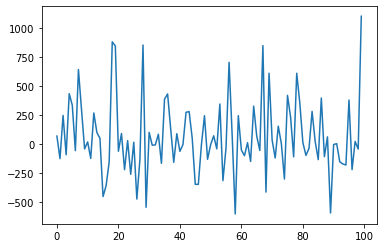

In [125]:
plt.plot(all_loss[:100])
print(all_loss[90:100])